## Classification (fill missing data with extreme forest regression) (with new training set and test set)

In [1]:
import pandas as pd
import numpy as np
all_data=pd.read_csv('PRSA_data.csv')

In [2]:
#Four dummy variables are introduced to deal with 'cbwd'
all_data['cvornot']=all_data['cbwd']=='cv'
for i in range(len(all_data)):
    if all_data['cvornot'][i]==True:
        all_data['cvornot'][i]=1
    else:
        all_data['cvornot'][i]=0

all_data['NEornot']=all_data['cbwd']=='NE'
for i in range(len(all_data)):
    if all_data['NEornot'][i]==True:
        all_data['NEornot'][i]=1
    else:
        all_data['NEornot'][i]=0

all_data['NWornot']=all_data['cbwd']=='NW'
for i in range(len(all_data)):
    if all_data['NWornot'][i]==True:
        all_data['NWornot'][i]=1
    else:
        all_data['NWornot'][i]=0

all_data['SEornot']=all_data['cbwd']=='SE'
for i in range(len(all_data)):
    if all_data['SEornot'][i]==True:
        all_data['SEornot'][i]=1
    else:
        all_data['SEornot'][i]=0

C:\Users\86180\AppData\Local\Temp/ipykernel_7232/3183737851.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cvornot'][i]=0
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\86180\AppData\Local\Temp/ipykernel_7232/3183737851.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['NEornot'][i

In [3]:
all_data['nightornot']=all_data['hour']<6 #treat 0 1 2 3 4 5 as night
for i in range(len(all_data)):
    if all_data['nightornot'][i]==True:
        all_data['nightornot'][i]=1
    else:
        all_data['nightornot'][i]=0

all_data['morningornot']=(all_data['hour']>5)&(all_data['hour']<12)  #treat 6 7 8 9 10 11 as morning
for i in range(len(all_data)):
    if all_data['morningornot'][i]==True:
        all_data['morningornot'][i]=1
    else:
        all_data['morningornot'][i]=0

all_data['afternoonornot']=(all_data['hour']>11)&(all_data['hour']<18)  #treat 12 13 14 15 16 17 as afternoon 
for i in range(len(all_data)):
    if all_data['afternoonornot'][i]==True:
        all_data['afternoonornot'][i]=1
    else:
        all_data['afternoonornot'][i]=0

all_data['eveningornot']=(all_data['hour']>17)  #treat 18 19 20 21 22 23 24 as evening
for i in range(len(all_data)):
    if all_data['eveningornot'][i]==True:
        all_data['eveningornot'][i]=1
    else:
        all_data['eveningornot'][i]=0

C:\Users\86180\AppData\Local\Temp/ipykernel_7232/397320567.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['nightornot'][i]=1
C:\Users\86180\AppData\Local\Temp/ipykernel_7232/397320567.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['morningornot'][i]=0
C:\Users\86180\AppData\Local\Temp/ipykernel_7232/397320567.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['afternoonornot'][i]=0
C:\Users\86180

In [4]:
#let DEWP, TEMP, PRES, Iws, Is, Ir be smoothed
from copy import deepcopy
all_data['new_DEWP']=deepcopy(all_data['DEWP'])
all_data['new_TEMP']=deepcopy(all_data['TEMP'])
all_data['new_PRES']=deepcopy(all_data['PRES'])
all_data['new_Iws']=deepcopy(all_data['Iws'])
all_data['new_Is']=deepcopy(all_data['Is'])
all_data['new_Ir']=deepcopy(all_data['Ir'])

for i in all_data.index:
    if i!=0 and i!=len(all_data)-1:
        all_data['new_DEWP'][i]=(all_data['DEWP'][i-1]+all_data['DEWP'][i]+all_data['DEWP'][i+1])/3
        all_data['new_TEMP'][i]=(all_data['TEMP'][i-1]+all_data['TEMP'][i]+all_data['TEMP'][i+1])/3
        all_data['new_PRES'][i]=(all_data['PRES'][i-1]+all_data['PRES'][i]+all_data['PRES'][i+1])/3
        all_data['new_Iws'][i]=(all_data['Iws'][i-1]+all_data['Iws'][i]+all_data['Iws'][i+1])/3
        all_data['new_Is'][i]=(all_data['Is'][i-1]+all_data['Is'][i]+all_data['Is'][i+1])/3
        all_data['new_Ir'][i]=(all_data['Ir'][i-1]+all_data['Ir'][i]+all_data['Ir'][i+1])/3
    else:
        all_data['new_DEWP'][i]=all_data['DEWP'][i]
        all_data['new_TEMP'][i]=all_data['TEMP'][i]
        all_data['new_PRES'][i]=all_data['PRES'][i]
        all_data['new_Iws'][i]=all_data['Iws'][i]
        all_data['new_Is'][i]=all_data['Is'][i]
        all_data['new_Ir'][i]=all_data['Ir'][i]

all_data['DEWP']=deepcopy(all_data['new_DEWP'])
all_data['TEMP']=deepcopy(all_data['new_TEMP'])
all_data['PRES']=deepcopy(all_data['new_PRES'])
all_data['Iws']=deepcopy(all_data['new_Iws'])
all_data['Is']=deepcopy(all_data['new_Is'])
all_data['Ir']=deepcopy(all_data['new_Ir'])
        
all_data.drop(columns=['new_DEWP','new_TEMP','new_PRES','new_Iws','new_Is','new_Ir'],inplace=True)

C:\Users\86180\AppData\Local\Temp/ipykernel_7232/18191542.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['new_DEWP'][i]=all_data['DEWP'][i]
C:\Users\86180\AppData\Local\Temp/ipykernel_7232/18191542.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['new_TEMP'][i]=all_data['TEMP'][i]
C:\Users\86180\AppData\Local\Temp/ipykernel_7232/18191542.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['new_PRES

In [5]:
#Fill the missing data with extreme forest regression
import copy
from sklearn.ensemble import ExtraTreesRegressor
all_data_nan=copy.deepcopy(all_data)  #存储含nan的行
all_data_isan=copy.deepcopy(all_data)  #存储不含nan的行
for i in range(len(all_data)):
    if np.isnan(all_data['pm2.5'][i])==True:
        all_data_isan.drop(index=i,inplace=True)
    else:
        all_data_nan.drop(index=i,inplace=True)

etr=ExtraTreesRegressor()
etr.fit(all_data_isan[['year','month','day','DEWP','TEMP','PRES','Iws','Is','Ir','cvornot','NEornot','NWornot','SEornot','nightornot','morningornot','afternoonornot','eveningornot']],all_data_isan['pm2.5'])
all_data_nan['pm2.5']=etr.predict(all_data_nan[['year','month','day','DEWP','TEMP','PRES','Iws','Is','Ir','cvornot','NEornot','NWornot','SEornot','nightornot','morningornot','afternoonornot','eveningornot']])

for i in all_data_nan.index:
    all_data['pm2.5'][i]=all_data_nan['pm2.5'][i]

C:\Users\86180\AppData\Local\Temp/ipykernel_7232/742584779.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['pm2.5'][i]=all_data_nan['pm2.5'][i]


In [6]:
#用lof算法识别离群值,并除去
from sklearn.neighbors import LocalOutlierFactor
model= LocalOutlierFactor(n_neighbors=60, contamination=0.2)  #由于样本数量较多，我们保留约五分之四的数据
all_data['outlierornot']=model._fit_predict(all_data.iloc[:,[5,6,7,8,10,11,12,13,14,15,16,17,18,19,20]])
for i in all_data.index:
    if all_data['outlierornot'][i]==-1:
        all_data.drop(index=i,inplace=True)
for i in all_data.index:
    if ((all_data['pm2.5'][i]==0)|(all_data['pm2.5'][i]<0)):
        all_data.drop(index=i,inplace=True)

In [7]:
all_data['label']=all_data['pm2.5']==0
for i in all_data.index:
    if all_data['pm2.5'][i]<=35:
        all_data['label'][i]=0   #low
    elif  all_data['pm2.5'][i]>150:
        all_data['label'][i]=2   #very high
    else:
        all_data['label'][i]=1  

C:\Users\86180\AppData\Local\Temp/ipykernel_7232/2584881631.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['label'][i]=1
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [8]:
#splitting data to X and y
from scipy import stats
all_data_X=all_data[['year','month','day','DEWP','TEMP','PRES','Iws','Is','Ir','cvornot','NEornot','NWornot','SEornot','nightornot','morningornot','afternoonornot','eveningornot']]
all_data_y=all_data[['year','month','day','label']]

In [9]:
#divide all data into training set and test set
import copy
from datetime import date
train_data_task5_3_X=copy.deepcopy(all_data_X)
test_data_task5_3_X=copy.deepcopy(all_data_X)
train_data_task5_3_y=copy.deepcopy(all_data_y)
test_data_task5_3_y=copy.deepcopy(all_data_y)
for i in all_data.index:
   if ((date(all_data['year'][i],all_data['month'][i],all_data['day'][i]).weekday()==3)&(all_data['hour'][i]%2==0)) or ((date(all_data['year'][i],all_data['month'][i],all_data['day'][i]).weekday()==6)&(all_data['hour'][i]%2!=0)):
      train_data_task5_3_X.drop(index=i,inplace=True)
      train_data_task5_3_y.drop(index=i,inplace=True)
   else:
      test_data_task5_3_X.drop(index=i,inplace=True)
      test_data_task5_3_y.drop(index=i,inplace=True)

In [10]:
for i in train_data_task5_3_X.columns:
    train_data_task5_3_X[i]= train_data_task5_3_X[i].astype(float)
    test_data_task5_3_X[i]=test_data_task5_3_X[i].astype(float)

train_data_task5_3_y['label']=train_data_task5_3_y['label'].astype(int)
test_data_task5_3_y['label']=test_data_task5_3_y['label'].astype(int)

from hyperopt import hp, fmin, rand, tpe, space_eval
from xgboost import XGBClassifier
space = [hp.uniform('x', 900, 1100), hp.uniform('y', 4, 7),hp.uniform('z',0.01,0.2)]
def q (args) :
    x, y,z= args
    xgc=XGBClassifier(n_estimators=int(x),max_depth=int(y),learning_rate=z)
    xgc.fit(train_data_task5_3_X,train_data_task5_3_y['label'])
    return -1*xgc.score(test_data_task5_3_X,test_data_task5_3_y['label'])
best = fmin(q, space, algo=rand.suggest,max_evals=100)

100%|██████████| 100/100 [1:00:33<00:00, 36.34s/trial, best loss: -0.8744457879887142]


In [11]:
int(best['x']),int(best['y']),best['z']

(1027, 6, 0.17438425621293352)

In [12]:
xgc=XGBClassifier(n_estimators=int(best['x']),max_depth=int(best['y']),learning_rate=best['z'])
xgc.fit(train_data_task5_3_X,train_data_task5_3_y['label'])
xgc.score(train_data_task5_3_X,train_data_task5_3_y['label']),xgc.score(test_data_task5_3_X,test_data_task5_3_y['label'])

(0.9988038674950992, 0.8744457879887142)

In [13]:
import matplotlib.pyplot as pl
from sklearn import metrics

def plot_matrix(y_true, y_pred, labels_name, title=None, thresh=0.7, axis_labels=None):
    cm = metrics.confusion_matrix(y_true, y_pred, labels=labels_name, sample_weight=None)  # 生成混淆矩阵 
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 归一化后的混淆矩阵的第i行第j列为真实标签为i的样本被预测为j类的比例
    pl.figure(dpi=160)
    pl.imshow(cm, interpolation='nearest', cmap=pl.get_cmap('Blues'))
    pl.colorbar()  # 绘制图例
    pl.title(title)
    num_local = np.array(range(len(labels_name)))
    if axis_labels is None:
        axis_labels = labels_name
    pl.xticks(num_local, axis_labels)
    pl.yticks(num_local, axis_labels)  # 将标签印在y轴坐标上
    pl.ylabel('True label')
    pl.xlabel('Predicted label')
    for i in range(np.shape(cm)[0]):
        for j in range(np.shape(cm)[1]):
            if cm[i][j]> 0:
                pl.text(j, i, format(round(cm[i][j] * 100,4)) + '%',
                        ha="center", va="center",
                        color="black" if cm[i][j] > thresh else "grey")
# 显示
    pl.show()

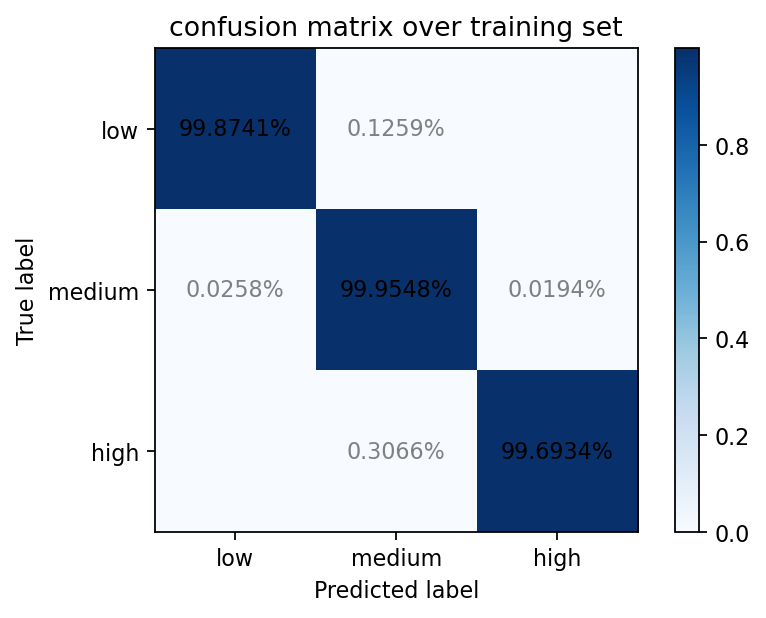

In [14]:
plot_matrix(train_data_task5_3_y['label'].astype(int),xgc.predict(train_data_task5_3_X), [0, 1, 2], title='confusion matrix over training set',
            axis_labels=['low', 'medium', 'high'])   

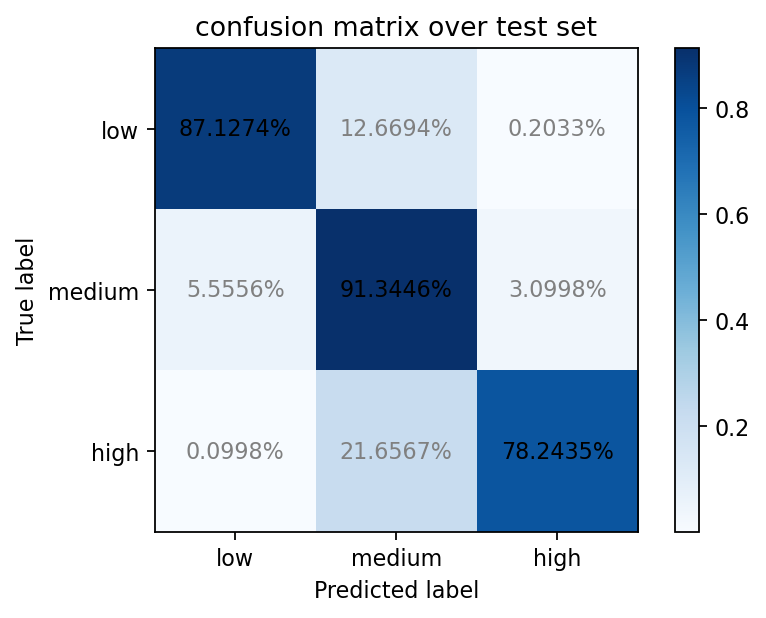

In [15]:
plot_matrix(test_data_task5_3_y['label'].astype(int),xgc.predict(test_data_task5_3_X), [0, 1, 2], title='confusion matrix over test set',
            axis_labels=['low', 'medium', 'high']) 